<a href="https://colab.research.google.com/github/heddgehogg/KSVD/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_3_%D0%A9%D0%B5%D1%80%D0%B1%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
from google.colab import files
uploaded = files.upload()

Saving shopping_trends.csv to shopping_trends.csv


1. Відкрити файл.

In [8]:
df = pd.read_csv('shopping_trends.csv')
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


2. Вивести розмір датасету.

In [9]:
df.shape

(3900, 19)

3. Вивести типи стовпців.

In [10]:
df.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),int64
Location,object
Size,object
Color,object
Season,object


4. Вивести кількість пропусків в кожному стовпці.

In [11]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


5. Перевірити чи є пропуски у датасеті.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

6. Побудувати гістограму віку клієнтів.

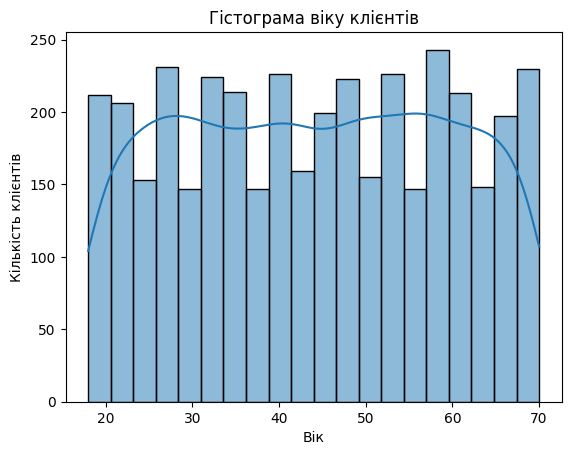

In [13]:
sns.histplot(data=df, x='Age', bins=20, kde=True)

plt.title('Гістограма віку клієнтів')
plt.xlabel('Вік')
plt.ylabel('Кількість клієнтів')

plt.show()

7. Побудувати графік розподілу, щоб порівняти, які товари клієнти купують найчастіше.

<ipython-input-14-18359fb70dd2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_items.head(10), x='Кількість покупок', y='Товар', palette='viridis')


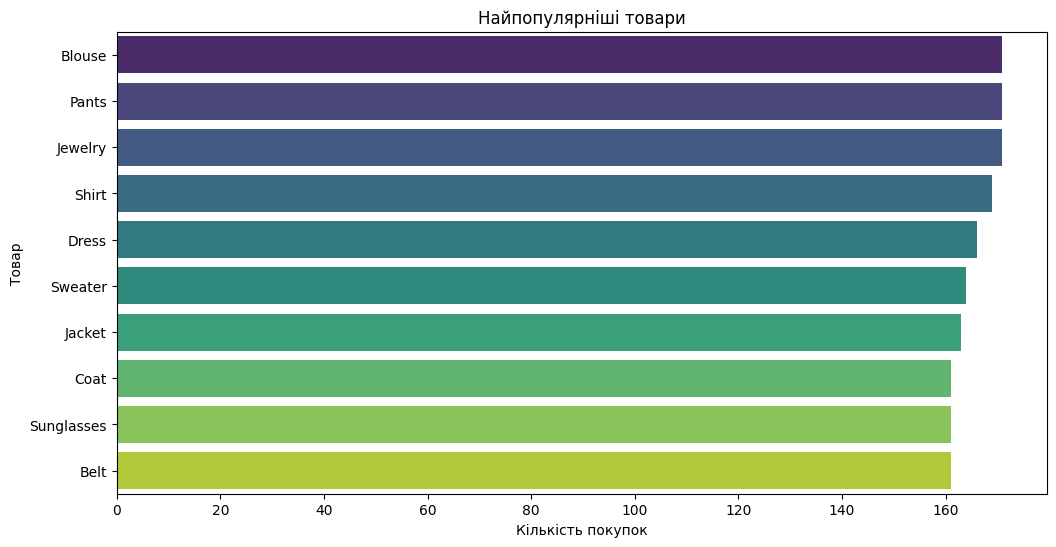

In [14]:
top_items = df['Item Purchased'].value_counts().reset_index()
top_items.columns = ['Товар', 'Кількість покупок']

plt.figure(figsize=(12, 6))
sns.barplot(data=top_items.head(10), x='Кількість покупок', y='Товар', palette='viridis')

plt.title('Найпопулярніші товари')
plt.xlabel('Кількість покупок')
plt.ylabel('Товар')

plt.show()

8. Побудувати залежність між віком та сумою покупок.

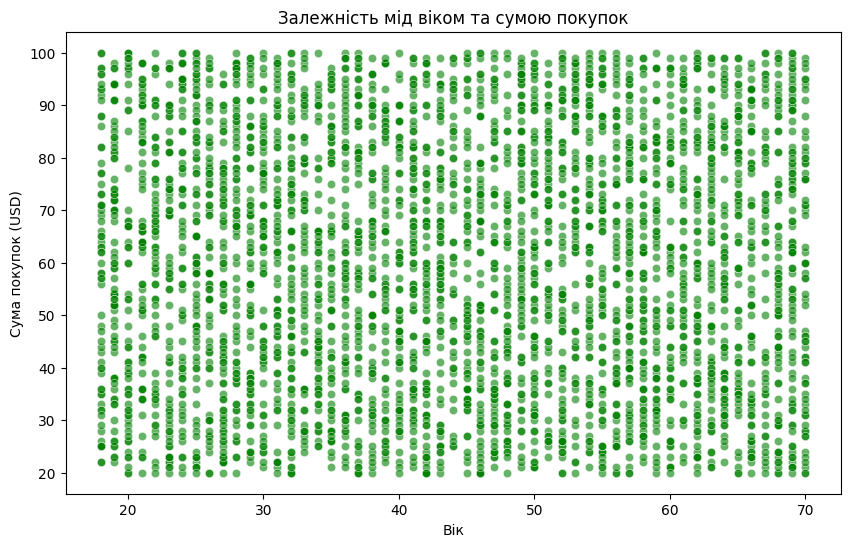

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Purchase Amount (USD)', alpha=0.6, color='green')

plt.title('Залежність мід віком та сумою покупок')
plt.xlabel('Вік')
plt.ylabel('Сума покупок (USD)')

plt.show()

9. Побудувати графік розподіку оцінок товарів для оцінки якості.

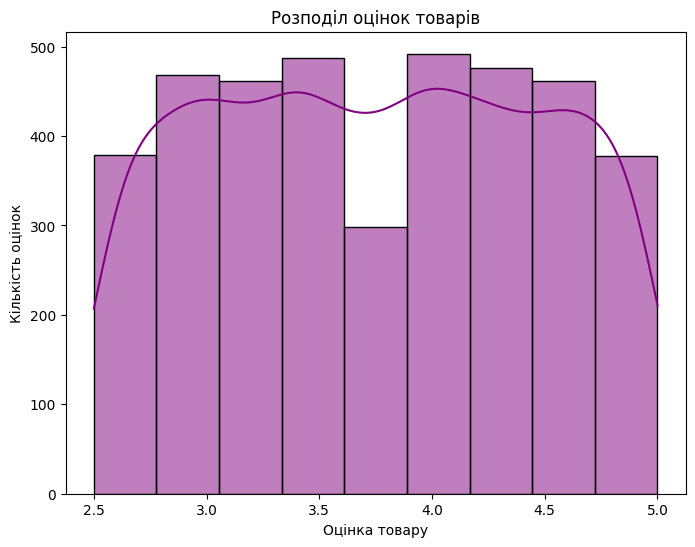

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Review Rating', bins=9, kde=True, color='purple')

plt.title('Розподіл оцінок товарів')
plt.xlabel('Оцінка товару')
plt.ylabel('Кількість оцінок')

plt.show()

10. Створіть категоріальну діаграму, щоб відобразити розподіл покупок за статею.

<ipython-input-18-494865ba20bd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


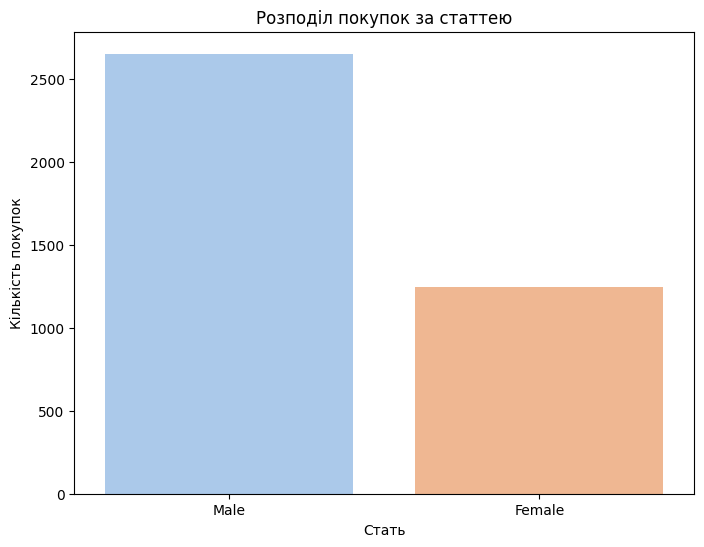

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Розподіл покупок за статтею')
plt.xlabel('Стать')
plt.ylabel('Кількість покупок')

plt.show()

11. Побудуйте стовпчату діаграму, яка відображає, у який сезон клієнти роблять найбільше покупок.

<ipython-input-19-5ddc1afcd9eb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_counts, x='Сезон', y='Кількість покупок', order=season_order, palette='bright')


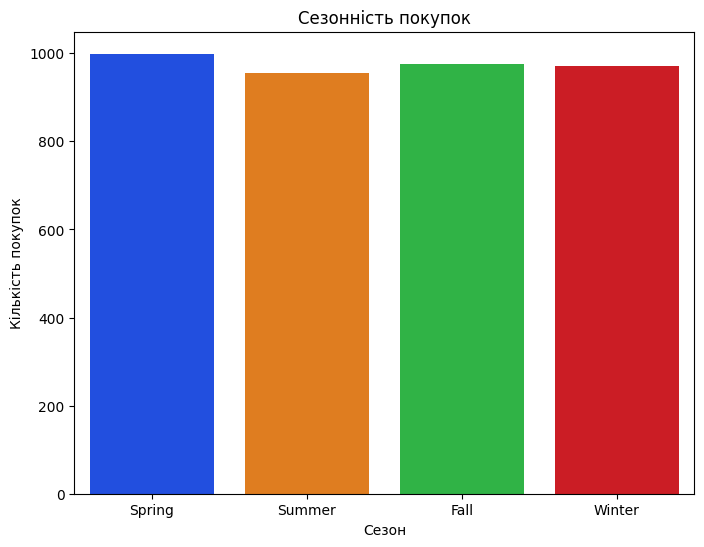

In [19]:
season_counts = df['Season'].value_counts().reset_index()
season_counts.columns = ['Сезон', 'Кількість покупок']
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

plt.figure(figsize=(8, 6))
sns.barplot(data=season_counts, x='Сезон', y='Кількість покупок', order=season_order, palette='bright')

plt.title('Сезонність покупок')
plt.xlabel('Сезон')
plt.ylabel('Кількість покупок')

plt.show()

12. Створіть графік розподілу розмірів одягу, щоб визначити популярність різних розмірів.

<ipython-input-20-a6efe507d667>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Size', palette='pastel', order=df['Size'].value_counts().index)


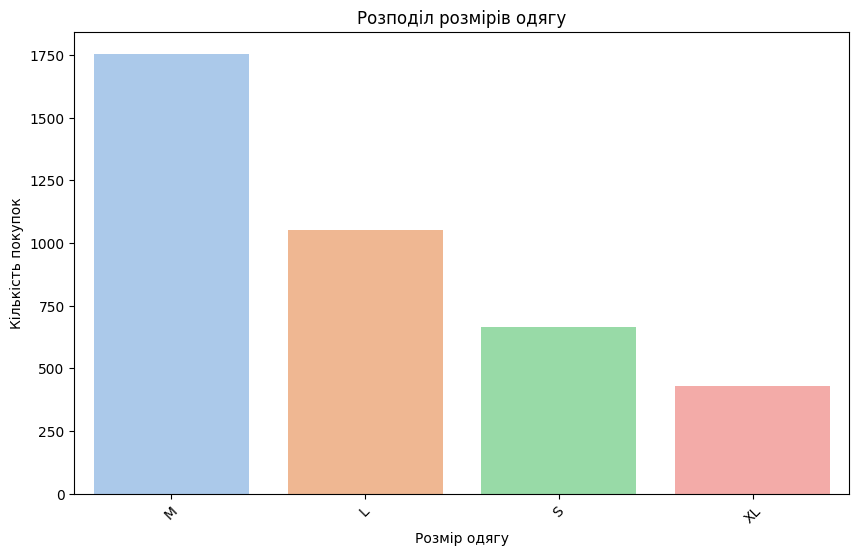

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Size', palette='pastel', order=df['Size'].value_counts().index)
plt.xticks(rotation=45)

plt.title('Розподіл розмірів одягу')
plt.xlabel('Розмір одягу')
plt.ylabel('Кількість покупок')

plt.show()

13. Підрахунок кількості покупок для кожного методу оплати.

<ipython-input-21-07dc60982ca6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_counts, x='Метод оплати', y='Кількість покупок', palette='Set2')


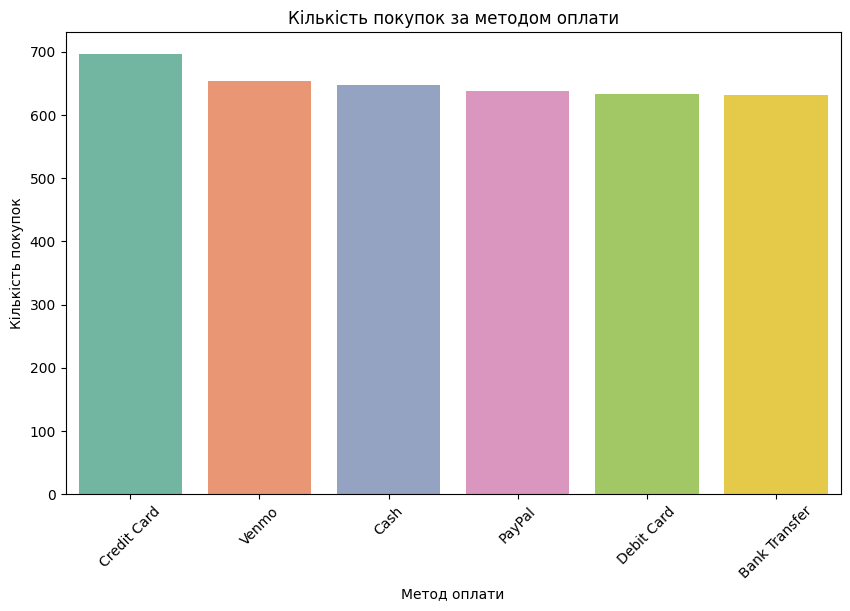

In [21]:
payment_counts = df['Payment Method'].value_counts().reset_index()
payment_counts.columns = ['Метод оплати', 'Кількість покупок']

plt.figure(figsize=(10, 6))
sns.barplot(data=payment_counts, x='Метод оплати', y='Кількість покупок', palette='Set2')

plt.xticks(rotation=45)

plt.title('Кількість покупок за методом оплати')
plt.xlabel('Метод оплати')
plt.ylabel('Кількість покупок')

plt.show()

14. Побудова тривимірної поверхні

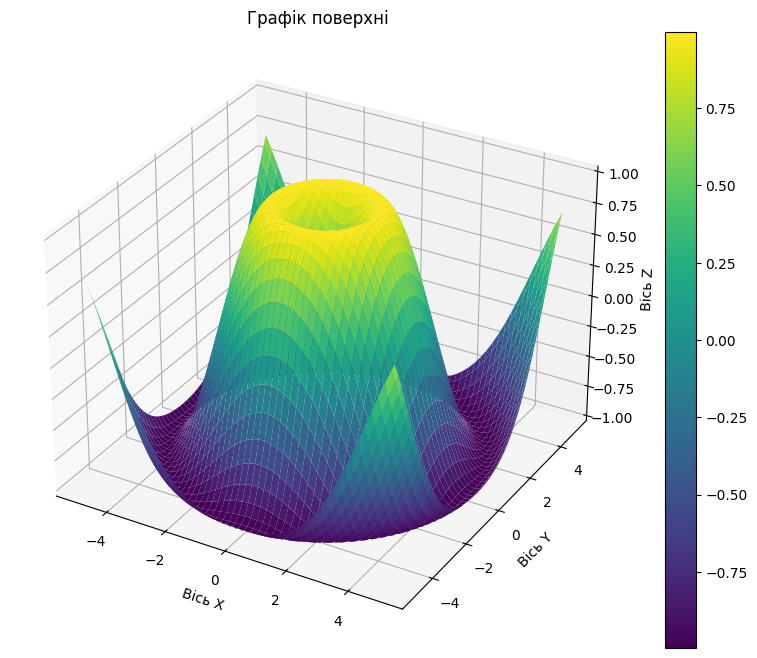

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, cmap='viridis')

ax.set_title('Графік поверхні')
ax.set_xlabel('Вісь X')
ax.set_ylabel('Вісь Y')
ax.set_zlabel('Вісь Z')

fig.colorbar(surf)

plt.show()

15. Візуалізація теплової карти матриці

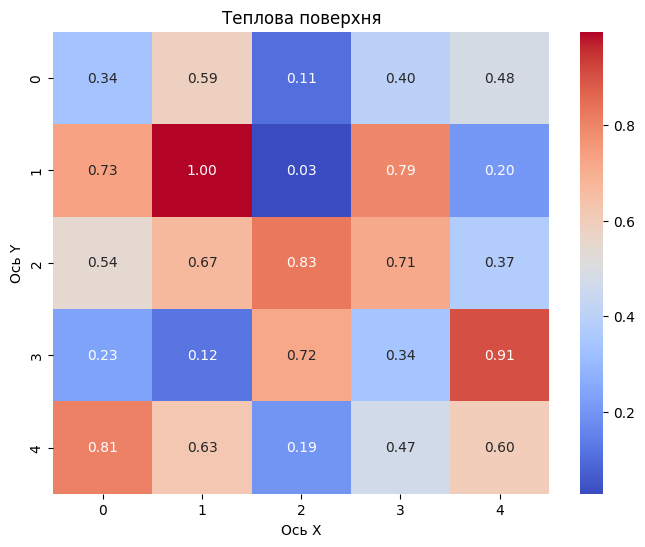

In [23]:
data_matrix = np.random.rand(5, 5)

plt.figure(figsize=(8, 6))
sns.heatmap(data_matrix, cmap='coolwarm', annot=True, fmt=".2f")

plt.title('Теплова поверхня')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')

plt.show()